In [1]:
import pandas as pd
import numpy as np

### Basic Dataset Info

In [2]:
df = pd.read_csv('adult.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [4]:
df.shape

(48842, 15)

In [5]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### Checking for null

In [6]:
df['workclass'].value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [7]:
df['occupation'].value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [8]:
for column in df.columns:
    print(df[column].unique())

[25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86]
['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
[226802  89814 336951 ... 129912 255835 257302]
['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th' 'Preschool']
[ 7  9 12 10  6 15  4 13 14 16  3 11  5  8  2  1]
['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']
['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']
['Own-child' 'Husband' 'Not-

In [9]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


### Dropping and Filling NaN

In [10]:
df.replace('?', np.nan, inplace= True)

In [11]:
df.isna().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [12]:
df.dropna(subset=['occupation'], inplace=True)

In [13]:
df.isna().sum()

age                  0
workclass            0
fnlwgt               0
education            0
educational-num      0
marital-status       0
occupation           0
relationship         0
race                 0
gender               0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     811
income               0
dtype: int64

In [14]:
native_country_mode = df['native-country'].mode()[0]
df[['native-country']] = df[['native-country']].fillna(native_country_mode)

In [15]:
df.isna().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [16]:
df.to_csv('adult(no missing value).csv')

### Checking Skewness

In [17]:
numeric_columns = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']

<Axes: >

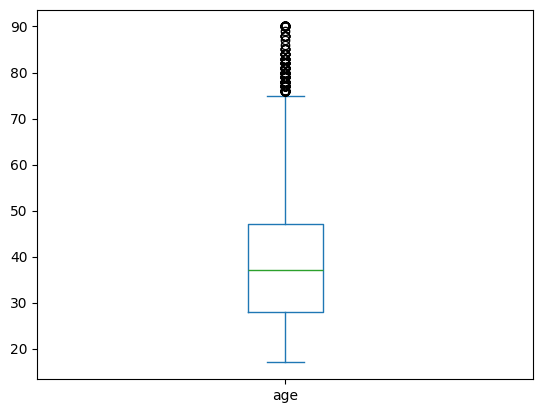

In [18]:
df['age'].plot(kind='box')

<Axes: >

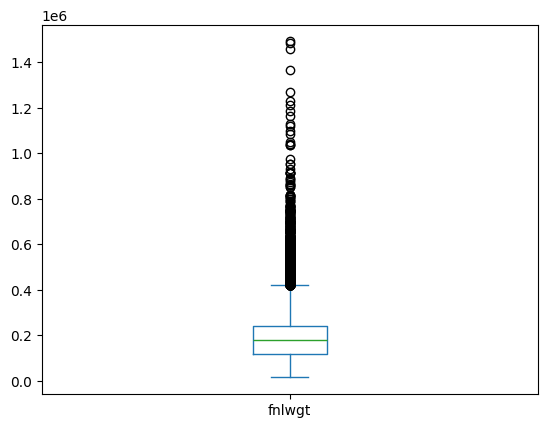

In [19]:
df['fnlwgt'].plot(kind='box')

<Axes: >

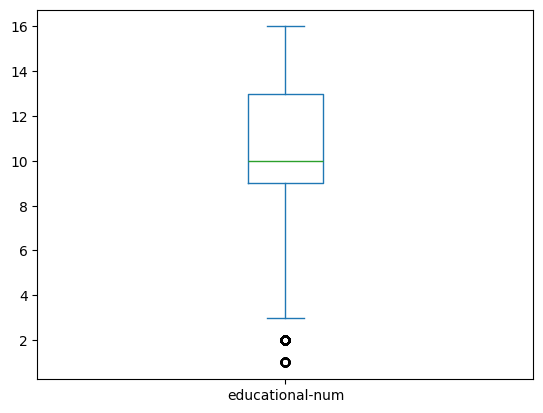

In [20]:
df['educational-num'].plot(kind="box")

<Axes: >

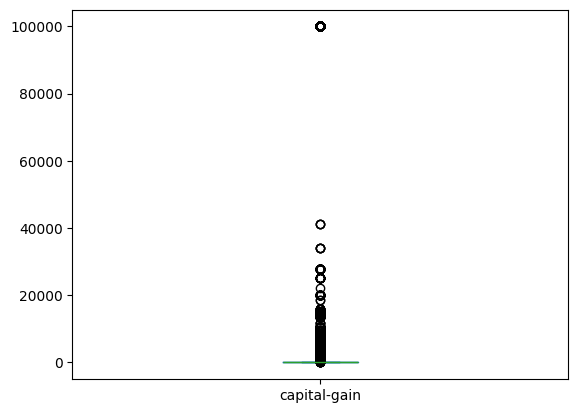

In [21]:
df['capital-gain'].plot(kind="box")

<Axes: >

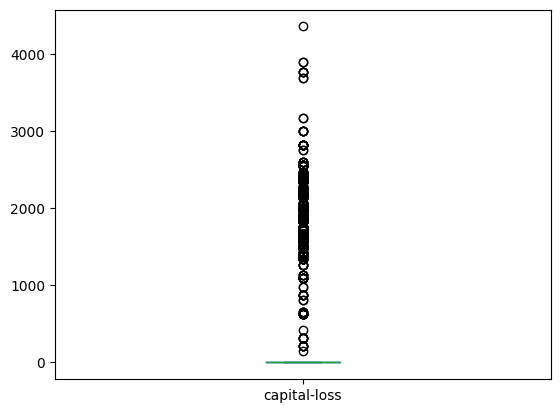

In [22]:
df['capital-loss'].plot(kind="box")

<Axes: >

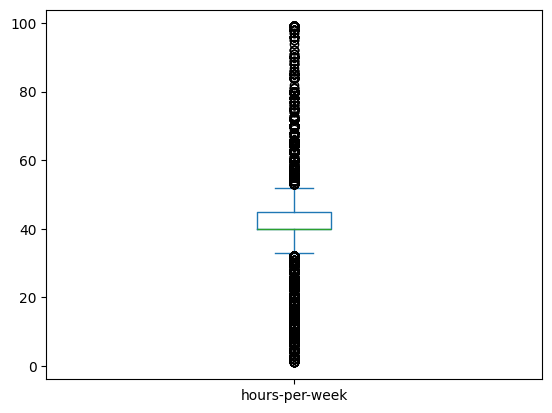

In [23]:
df['hours-per-week'].plot(kind="box")

In [24]:
from scipy.stats import skew

In [25]:
for col in numeric_columns:
    print(col + " : " + str(df[col].skew()))

age : 0.5342298728864318
fnlwgt : 1.4437641538830817
educational-num : -0.31437886492004724
capital-gain : 11.683883725667696
capital-loss : 4.51398103737005
hours-per-week : 0.34107603666237274


In [26]:
import seaborn as sns

<Axes: xlabel='capital-gain', ylabel='Density'>

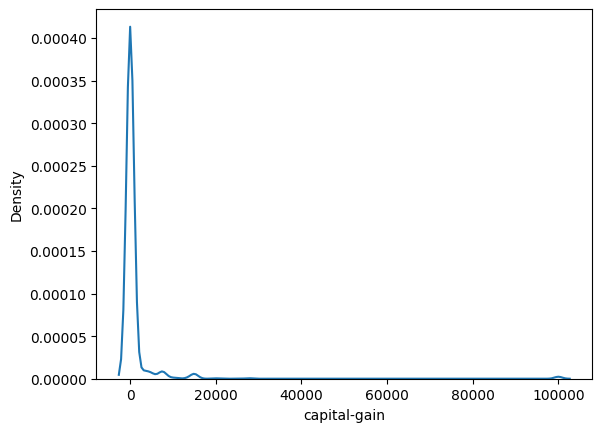

In [27]:
sns.kdeplot(df['capital-gain'])

<Axes: xlabel='capital-loss', ylabel='Density'>

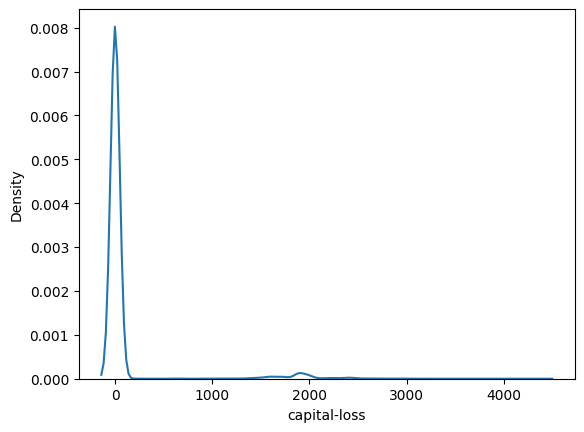

In [28]:
sns.kdeplot(df['capital-loss'])

<Axes: xlabel='hours-per-week', ylabel='Density'>

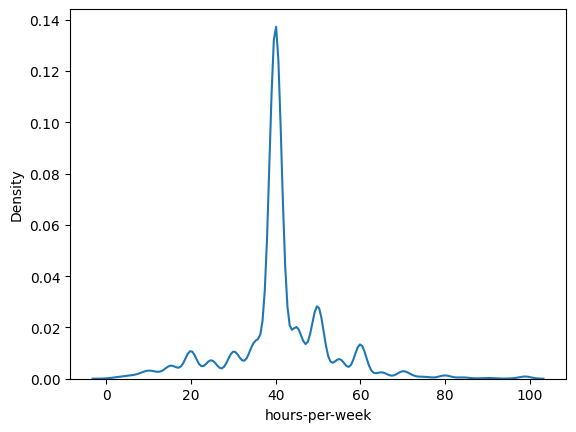

In [29]:
sns.kdeplot(df['hours-per-week'])

### Fixing skewness

In [30]:
from scipy.stats import yeojohnson
from sklearn.preprocessing import PowerTransformer

In [31]:
pt = PowerTransformer()

In [32]:
features = [col for col in df.columns]
features.remove('education')

In [33]:
df_numeric_fixed_skew = pd.DataFrame(pt.fit_transform(df[numeric_columns]), columns=numeric_columns)

In [34]:
for col in df_numeric_fixed_skew:
    print(col + " : " + str(df_numeric_fixed_skew[col].skew()))

age : -0.01565651455872085
fnlwgt : 0.01647279540779947
educational-num : 0.02261938399467761
capital-gain : 3.002449045340039
capital-loss : 4.2611374081227265
hours-per-week : 0.2389471068706085


### Encoding Object Column to Numeric

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
le = LabelEncoder()

In [37]:
df_object = df.select_dtypes(exclude=[np.number]).reset_index()
df_object.drop('index', inplace=True, axis = 1)

In [38]:
object_columns = [col for col in df_object.columns]

In [39]:
for col in df_object:
    df_object[col] = le.fit_transform(df_object[col])

### Concatenating and Saving all to one dataset

In [40]:
df_cleaned = pd.merge(df_numeric_fixed_skew, df_object, left_index=True, right_index=True)

In [41]:
df_cleaned.drop('education', inplace=True, axis = 1)

In [42]:
df_cleaned.corr()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass,marital-status,occupation,relationship,race,gender,native-country,income
age,1.000000,-0.069153,0.077823,0.120223,0.059494,0.155672,0.082498,-0.316478,-0.009175,-0.265008,0.020122,0.094998,-0.005496,0.264351
fnlwgt,-0.069153,1.000000,-0.036450,-0.006923,-0.001362,-0.021979,-0.038824,0.033450,-0.000998,0.009873,-0.019149,0.025380,-0.064308,-0.002783
educational-num,0.077823,-0.036450,1.000000,0.121058,0.080968,0.148851,0.045484,-0.064859,0.097949,-0.095698,0.027992,0.009579,0.077981,0.341304
capital-gain,0.120223,-0.006923,0.121058,1.000000,-0.067479,0.076805,0.014213,-0.059562,0.011372,-0.077749,0.021710,0.064354,0.011683,0.266354
capital-loss,0.059494,-0.001362,0.080968,-0.067479,1.000000,0.052074,0.005387,-0.036518,0.014121,-0.052846,0.018129,0.041914,0.006697,0.137506
hours-per-week,0.155672,-0.021979,0.148851,0.076805,0.052074,1.000000,0.048512,-0.182385,0.014992,-0.258799,0.041387,0.230601,0.007493,0.227048
workclass,0.082498,-0.038824,0.045484,0.014213,0.005387,0.048512,1.000000,-0.033646,0.017331,-0.064867,0.047925,0.069652,0.004043,0.015605
marital-status,-0.316478,0.033450,-0.064859,-0.059562,-0.036518,-0.182385,-0.033646,1.000000,0.016555,0.180848,-0.070114,-0.119993,-0.022089,-0.193587
occupation,-0.009175,-0.000998,0.097949,0.011372,0.014121,0.014992,0.017331,0.016555,1.000000,-0.051429,-0.001904,0.056734,-0.002208,0.049027
relationship,-0.265008,0.009873,-0.095698,-0.077749,-0.052846,-0.258799,-0.064867,0.180848,-0.051429,1.000000,-0.116770,-0.583752,-0.007196,-0.253460


<Axes: >

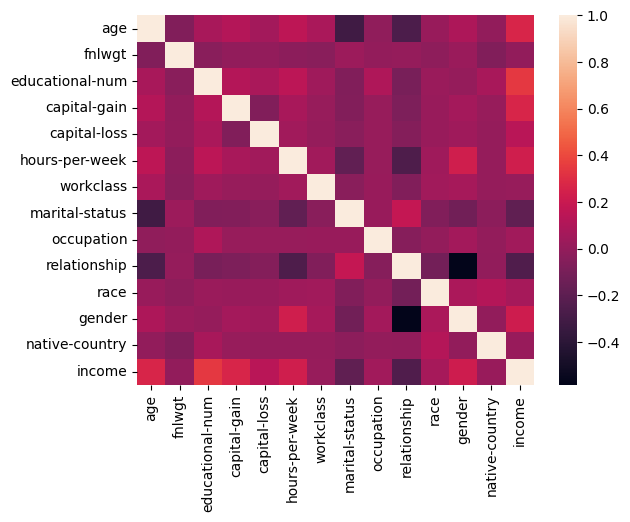

In [43]:
sns.heatmap(df_cleaned.corr())

In [44]:
df_cleaned.to_csv('adult(cleaned).csv', index=False)

In [45]:
df_cleaned.tail(1)

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass,marital-status,occupation,relationship,race,gender,native-country,income
46032,1.031842,0.982965,-0.484505,3.304983,-0.223015,-0.071814,3,2,3,5,4,0,38,1


In [46]:
df_numeric = pd.DataFrame(df[numeric_columns], columns=numeric_columns)

In [47]:
df_cleaned_non_normalized = pd.merge(df_numeric, df_object, left_index=True, right_index=True)
df_cleaned_non_normalized.drop('education', inplace=True, axis = 1)

In [48]:
df_cleaned_non_normalized.to_csv('adult(cleaned non normalized).csv', index=False)

### All clean of skewness including encoded object columns

In [49]:
df_object_fix_skewness = pd.DataFrame(pt.fit_transform(df_object), columns=object_columns)

In [50]:
df_cleaned_all = pd.merge(df_numeric_fixed_skew, df_object_fix_skewness, left_index=True, right_index=True)

In [52]:
df_cleaned_all.drop('education', inplace=True, axis = 1)

In [54]:
df_cleaned_all.drop('income', inplace=True, axis = 1)

In [55]:
df_cleaned_all = pd.merge(df_cleaned_all, df_cleaned['income'], left_index=True, right_index=True)

In [56]:
df_cleaned_all.to_csv('adult(cleaned all column).csv', index=False)